### 377. Combination Sum IV

In [ ]:
class Solution:
    def combinationSum4(self, nums: List[int], target: int) -> int:
        # dp[i] = number of ways to sum up to target i
        dp = [0]*(target+1)
        # 1 way to sum to 0 (using no numbers)
        dp[0] = 1
        
        for target in range(1,target+1):
            for num in nums:
                ## if there is a preceding sum that num
                ## can add on to to make the current target
                ## increase num of ways to make it by that
                if target-num >= 0:
                    dp[target] += dp[target-num]
                    
        return dp[target]

- This problem could be solved via **Bottom-Up Dynamic Programming**, and the solution is very similar to the solution of *322. Coin Change*.
- If we rephrase this problem as finding every possible way, including different orders, to sum up to an `amount` where `nums` represents the `coins` and `target` represents the `amount`, the only thing we are doing differently here is sum up **every possible way of reaching the current amount**, `i` in `dp`, from the number of ways to make up a previous amount, whereas in the other problem we are finding the **smallest number of coins needed to reach the current amount** by looking at the number of coins needed to reach a previous amount.

### 518. Coin Change II

In [ ]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        dp = [0] * (amount+1)  # one index per amount from 0 to amount
        dp[0] = 1  # there is exactly 1 way to make 0 (by using no coins)
        for coin in coins:
            for i in range(coin, amount+1):
                dp[i] += dp[i-coin]
        return dp[amount]

- As with most dynamic programming problems so far, I have not been able to come up with the solution myself.
- We utilize a dynamic programming list `dp` to build up the solution incrementally. Every index represents an `amount` that can be made up with the `coins`, and the value at an index represents the number of ways that `amount` can be made up.
- How it works is best explained in the graphic below.

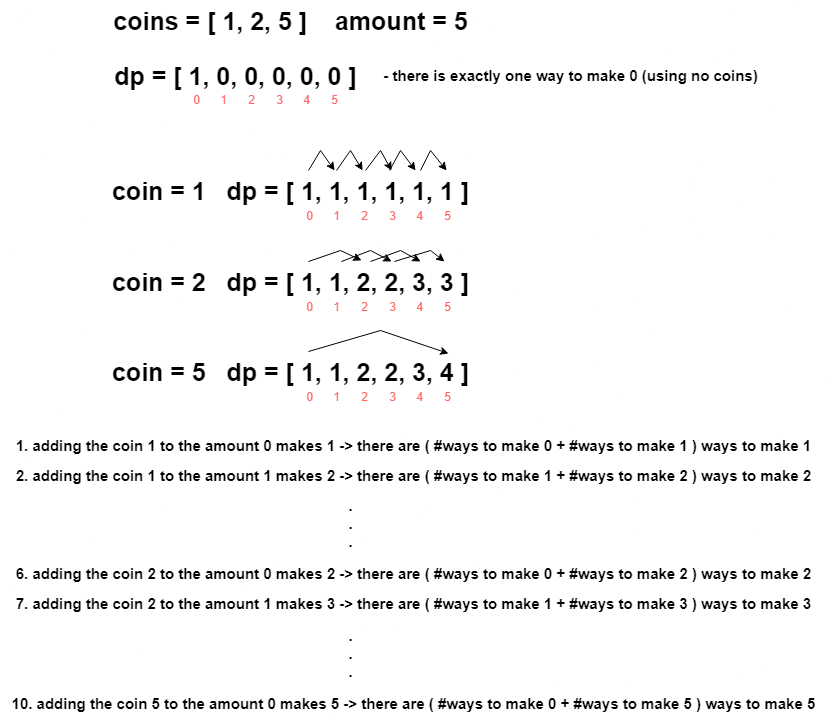

### 2369. Check if There is a Valid Partition For The Array

In [ ]:
class Solution:
    def validPartition(self, nums: List[int]) -> bool:

        def isValid(i: int):
            if i < 0: return True

            if ( nums[i] == nums[i-1] and isValid(i-2) ) or \
                ( nums[i] == nums[i-1] == nums[i-2] and isValid(i-3) ) or \
                ( nums[i] == nums[i-1]+1 == nums[i-2]+2 and isValid(i-3) ):
                    return True
            return False
            
        return isValid(len(nums)-1)

- How it works is that we start at the last index of `nums`, and recursively moving to the front, we check for the three valid partitions.
- If the last two to three fields form a valid partition and the index ahead of them is also the end of a valid partition, `isValid` returns `True`.

### 2707. Extra Characters in a String

In [ ]:
class Solution:
    def minExtraChar(self, s: str, dictionary: List[str]) -> int:
        dp = [0] * 51
        
        for i in range(len(s)-1, -1, -1):
            # every step we get one more extra letter
            dp[i] = dp[i+1] + 1 
            for word in dictionary:
                # "add" current word to position 
                # if it is within bounds and equal to s from that position
                if i + len(word) <= len(s) and s[i:i+len(word)] == word:
                    # the minimum extra letters at this pos is the 
                    # smaller one between the extra letters one pos
                    # after the matched word and the number of extra 
                    # letters in the current position
                    dp[i] = min(dp[i], dp[i+len(word)])
        return dp[0]

- To solve this problem, we start at the last character in `s` and iterate to the first character.
- In every iteration, we increase the number of extra characters at the current position in `dp` by `1` according to the previous position.
- Then we try every `word` from the given `dictionary` at the current position and set the number of extra letters in the current position to the smallest possible value across the matching words right neighbors.